In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tabulate import tabulate
import locale
import matplotlib.pyplot as plt # Import Matplotlib
import seaborn as sns # Import Seaborn

# --- 1. INPUT DATA ---
print("--- 1. INPUT DATA (Membaca CSV) ---")
try:
    df_raw = pd.read_csv('dataset.laporan.csv', index_col=0)
except FileNotFoundError:
    # Data Placeholder jika file tidak ditemukan
    data_dict = {'desember-2024': [32080568, 541565582, 481519430, 19922231, 255137],
                'maret-2025': [29709278, 542666796, 441561126, 19901284, 2745731]}
    index_labels = ['kas', 'tabungan', 'deposito', 'keuntungan', 'kerugian']
    df_raw = pd.DataFrame(data_dict, index=index_labels)

--- 1. INPUT DATA (Membaca CSV) ---


In [4]:
# --- 2. PRE-PROCESSING & PENGELOLAAN DATA ---
print("\n--- 2. PRE-PROCESSING & PENGELOLAAN DATA (Transpos Data) ---")
df = df_raw.T 
print("DataFrame setelah Transpos:")
print(tabulate(df, headers='keys', tablefmt='fancy_grid', numalign="right"))


--- 2. PRE-PROCESSING & PENGELOLAAN DATA (Transpos Data) ---
DataFrame setelah Transpos:
╒═══════════════╤═════════════╤═════════════╤═════════════╤══════════════╤═════════════╕
│               │         kas │    tabungan │    deposito │   keuntungan │    kerugian │
╞═══════════════╪═════════════╪═════════════╪═════════════╪══════════════╪═════════════╡
│ desember-2024 │ 3.20806e+07 │ 5.41566e+08 │ 4.81519e+08 │  1.99222e+07 │      255137 │
├───────────────┼─────────────┼─────────────┼─────────────┼──────────────┼─────────────┤
│ maret-2025    │ 2.97093e+07 │ 5.42667e+08 │ 4.41561e+08 │  1.99013e+07 │ 2.74573e+06 │
╘═══════════════╧═════════════╧═════════════╧═════════════╧══════════════╧═════════════╛


In [5]:
# --- 3. FEATURE ENGINEERING & DEFINISI DATA ---
print("\n--- 3. FEATURE DATA (X) dan TARGET (Y) ---")
Y = df['keuntungan']
X = df.drop('keuntungan', axis=1)
X_train, Y_train = X, Y 


--- 3. FEATURE DATA (X) dan TARGET (Y) ---


In [6]:
# --- 4. PELATIHAN MODEL & PREDIKSI ---
print("\n--- 4. PELATIHAN MODEL RANDOM FOREST REGRESSOR ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_train) 
rmse_rf = np.sqrt(mean_squared_error(Y_train, Y_pred_rf))
mae_rf = mean_absolute_error(Y_train, Y_pred_rf)

# Data Placeholder
data_dict = {'desember-2024': [32080568, 541565582, 481519430, 19922231, 255137],
            'maret-2025': [29709278, 542666796, 441561126, 19901284, 2745731]}
index_labels = ['kas', 'tabungan', 'deposito', 'keuntungan', 'kerugian']
df_raw = pd.DataFrame(data_dict, index=index_labels)
df = df_raw.T 

Y = df['keuntungan']
X = df.drop('keuntungan', axis=1)
X_train, Y_train = X, Y 

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_train) 
rmse_rf = np.sqrt(mean_squared_error(Y_train, Y_pred_rf))
mae_rf = mean_absolute_error(Y_train, Y_pred_rf)

importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Fitur': feature_names,
    'Pentingnya (%)': (importances * 100).round(2)
}).sort_values(by='Pentingnya (%)', ascending=False).reset_index(drop=True)


--- 4. PELATIHAN MODEL RANDOM FOREST REGRESSOR ---


In [7]:
# --- 5. MENAMPILKAN HASIL & ANALISIS ---
print("--- 5. HASIL & ANALISIS RF ---")

# a. Perbandingan Prediksi (Tabel)
hasil_df = pd.DataFrame({
    'Periode': df.index,
    'Keuntungan Aktual': Y_train,
    'Keuntungan Prediksi RF': Y_pred_rf.round(0)
})
print("a. TABEL PERBANDINGAN AKTUAL vs. PREDIKSI:")
print(tabulate(hasil_df, headers='keys', tablefmt='fancy_grid', numalign="right", floatfmt=","))

# b. Metrik Evaluasi (Tabel)
metrik_rf = pd.DataFrame({
    'Metrik': ['RMSE', 'MAE'],
    'Nilai': [rmse_rf, mae_rf]
})
print("\nb. TABEL METRIK EVALUASI:")
print(tabulate(metrik_rf, headers='keys', tablefmt='fancy_grid', numalign="right", floatfmt=",.2f"))

# c. Pentingnya Fitur (Tabel)
print("\nc. TABEL ANALISIS PENTINGNYA FITUR (FEATURE IMPORTANCE):")
print(tabulate(feature_importance_df, headers='keys', tablefmt='fancy_grid', numalign="right"))


--- 5. HASIL & ANALISIS RF ---
a. TABEL PERBANDINGAN AKTUAL vs. PREDIKSI:
╒═══════════════╤═══════════════╤═════════════════════╤══════════════════════════╕
│               │ Periode       │   Keuntungan Aktual │   Keuntungan Prediksi RF │
╞═══════════════╪═══════════════╪═════════════════════╪══════════════════════════╡
│ desember-2024 │ desember-2024 │            19922231 │             19,917,623.0 │
├───────────────┼───────────────┼─────────────────────┼──────────────────────────┤
│ maret-2025    │ maret-2025    │            19901284 │             19,906,730.0 │
╘═══════════════╧═══════════════╧═════════════════════╧══════════════════════════╛

b. TABEL METRIK EVALUASI:
╒════╤══════════╤══════════╕
│    │ Metrik   │    Nilai │
╞════╪══════════╪══════════╡
│  0 │ RMSE     │ 5,044.71 │
├────┼──────────┼──────────┤
│  1 │ MAE      │ 5,027.28 │
╘════╧══════════╧══════════╛

c. TABEL ANALISIS PENTINGNYA FITUR (FEATURE IMPORTANCE):
╒════╤══════════╤══════════════════╕
│    │ Fitur    │   

<Figure size 800x500 with 0 Axes>

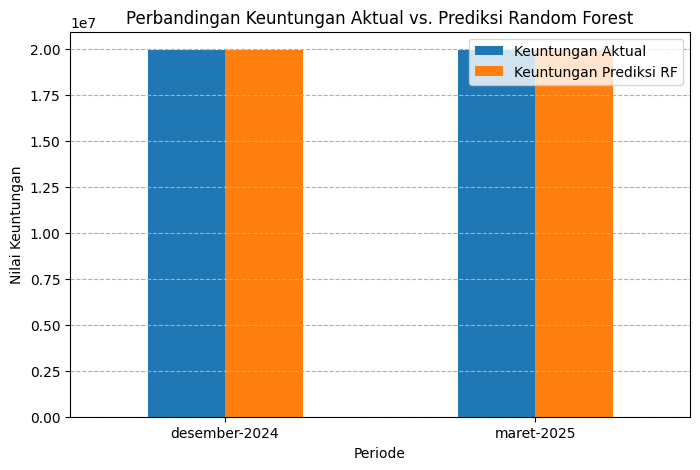

C:\Users\Satriazoid\AppData\Local\Temp\ipykernel_2188\81844307.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pentingnya (%)', y='Fitur', data=feature_importance_df, palette='viridis')


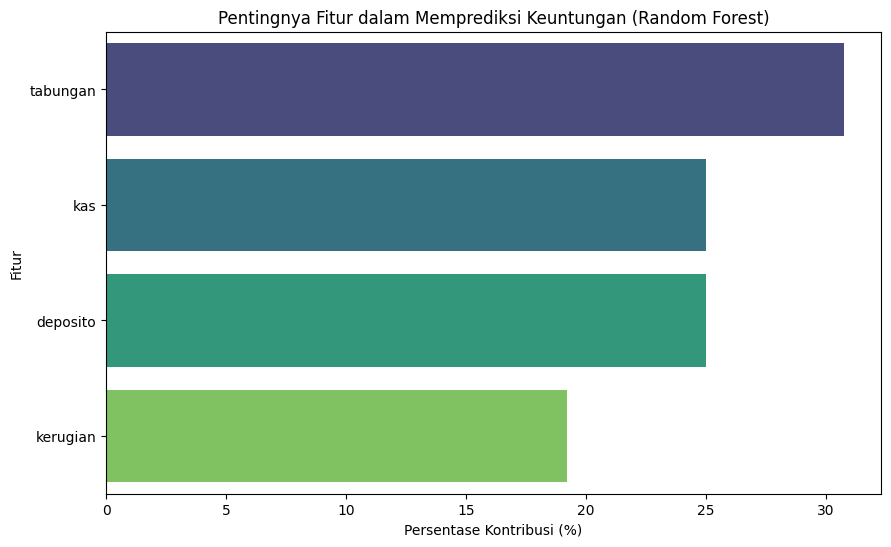

In [8]:
# --- 6. VISUALISASI HASIL (GRAFIK) ---

plt.figure(figsize=(8, 5))
hasil_df_plot = hasil_df.set_index('Periode')
hasil_df_plot[['Keuntungan Aktual', 'Keuntungan Prediksi RF']].plot(kind='bar', figsize=(8, 5))
plt.title('Perbandingan Keuntungan Aktual vs. Prediksi Random Forest')
plt.ylabel('Nilai Keuntungan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Pentingnya (%)', y='Fitur', data=feature_importance_df, palette='viridis')
plt.title('Pentingnya Fitur dalam Memprediksi Keuntungan (Random Forest)')
plt.xlabel('Persentase Kontribusi (%)')
plt.show()

In [9]:
# --- 7. Hasil Akhir dan Perbandingan (Format Rupiah) ---

# Anda harus memastikan fungsi format_rupiah() dan konfigurasi locale
# telah didefinisikan sebelumnya (seperti pada kode SVR).
try:
    locale.setlocale(locale.LC_ALL, 'id_ID.UTF-8') 
except:
    locale.setlocale(locale.LC_ALL, 'Indonesian_Indonesia')

def format_rupiah(x):
    # Menggunakan locale format_string untuk pemformatan Indonesia (titik sebagai pemisah ribuan)
    return locale.format_string("%d", x, grouping=True)

print("--- Hasil Prediksi dan Metrik Evaluasi Random Forest ---")

hasil_df = pd.DataFrame({
    'Periode': df.index,
    'Keuntungan Aktual': Y_train,
    'Keuntungan Prediksi RF': Y_pred_rf.round(0)
})

# Menerapkan format Rupiah ke kolom hasil prediksi dan aktual
hasil_df['Keuntungan Aktual'] = hasil_df['Keuntungan Aktual'].apply(format_rupiah)
hasil_df['Keuntungan Prediksi RF'] = hasil_df['Keuntungan Prediksi RF'].apply(format_rupiah)

print(tabulate(hasil_df, headers='keys', tablefmt='fancy_grid', numalign="right"))

# Menggunakan fungsi round() bawaan Python untuk memformat metrik
print(f"\nRMSE (Root Mean Squared Error): {format_rupiah(round(rmse_rf, 0))} Rupiah")
print(f"MAE (Mean Absolute Error): {format_rupiah(round(mae_rf, 0))} Rupiah")
print("-----------------------------------------------------")

--- Hasil Prediksi dan Metrik Evaluasi Random Forest ---
╒═══════════════╤═══════════════╤═════════════════════╤══════════════════════════╕
│               │ Periode       │ Keuntungan Aktual   │ Keuntungan Prediksi RF   │
╞═══════════════╪═══════════════╪═════════════════════╪══════════════════════════╡
│ desember-2024 │ desember-2024 │ 19.922.231          │ 19.917.623               │
├───────────────┼───────────────┼─────────────────────┼──────────────────────────┤
│ maret-2025    │ maret-2025    │ 19.901.284          │ 19.906.730               │
╘═══════════════╧═══════════════╧═════════════════════╧══════════════════════════╛

RMSE (Root Mean Squared Error): 5.045 Rupiah
MAE (Mean Absolute Error): 5.027 Rupiah
-----------------------------------------------------
